In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.optimize import fsolve
import math
def eulers_method(f,x0,tf,h):
    '''
    Eulers method to approximate the solution to dx/dt = f(t,x)
    Inputs: 
        f : function that defines the ode dx/dt = f(t,x)
        x0: initial condition
        tf: final time
        h: numerical step size
    Outputs:
        soln: numerical approximation of the solutions
        t: numerical grid
    '''

    t = np.arange(0, tf, h) # Numerical grid
    soln = np.zeros(len(t))  # Approximate solution
    soln[0] = x0
    
    for n in range(0, len(t) - 1):
        soln[n + 1] = soln[n] + h*f(t[n], soln[n])
    
    return soln, t
def RK4(f,x0,tf,h):
    '''
    Runge-Kutta 4 numerical method to approximate the solution to dx/dt = f(t,x)
    Inputs: 
        f : function that defines the ode dx/dt = f(t,x)
        x0: initial condition
        tf: final time
        h: numerical step size
    Outputs:
        soln: numerical approximation of the solutions
        t: numerical grid
    '''

    t = np.arange(0, tf, h) # Numerical grid
    soln = np.zeros(len(t))  # Approximate solution
    soln[0] = x0

    # Runge-Kutta 4 method
    for n in range(0, len(t) - 1):  
    
        # Slopes
        k1 = f(t[n], soln[n])
        k2 = f(t[n]+h/2, soln[n]+ h*k1/2)
        k3 = f(t[n]+h/2, soln[n]+ h*k2/2)
        k4 = f(t[n]+h, soln[n]+ h*k3)
    
        # Solution update
        soln[n + 1] = soln[n] + h*( k1 + 2*k2 + 2*k3 + k4)/6
        
    return soln, t

def RK4_system(f,x0,tf,h):
    '''
    Runge-Kutta 4 numerical method to approximate the solution to the system 
        dx/dt = f(x,y) & dy/dt = g(x,y)
    Inputs: 
        f : function that defines the ode system: assumes vector form of dependent variables
        x0: initial condition
        tf: final time
        h: numerical step size
    Outputs:
        soln: numerical approximation of the solutions
        t: numerical grid
    '''

    t = np.arange(0, tf, h) # Numerical grid
    soln = np.zeros([len(x0),len(t)])  # Approximate solution
    soln[:,0] = x0

    # Runge-Kutta 4 method
    for n in range(0, len(t) - 1):  
    
        # Slopes
        k1 = f(soln[:,n])
        k2 = f(soln[:,n]+ h*k1/2)
        k3 = f(soln[:,n]+ h*k2/2)
        k4 = f(soln[:,n]+ h*k3)
    
        # Solution update
        soln[:,n + 1] = soln[:,n] + h*( k1 + 2*k2 + 2*k3 + k4)/6
        
    return soln, t

## Function to create a bifurcation diagram
def bifurcation_diagram(f,f_x,r,x,rlabel='r',xlabel='x'):
    """ produce a bifurcation diagram for a function f(r,x) given
        f and its partial derivative f_x(r,x) over a domain given by numpy arrays r and x
        
        f(r,x)  :  RHS function of autonomous ode dx/dt = f(r,x) (f(mu, x))
        f_x(r,x):  partial derivative of f with respect to x (do this analytically and provide it for the function)
        r       :  numpy array giving r coordinates of domain (mu in "our language" aka parameter- the bounds for what it could be - parameter vector)
        x       :  numpy array giving x coordinates of domain (vector of values for equilibrium points)
        rlabel  :  string for x axis parameter label
    """
    # set up a mesh grid and extract the 0 level set of f
    R,X = np.meshgrid(r,x)
    plt.figure(figsize = (12, 8))
    CS = plt.contour(R,X,f(R,X),[0],colors='k')
    plt.clf()
    
    c0 = CS.collections[0]
    # for each path in the contour extract vertices and mask by the sign of df/dx
    for path in c0.get_paths():
        vertices = path.vertices
        vr = vertices[:,0]
        vx = vertices[:,1]
        mask = np.sign(f_x(vr,vx))
        stable = mask < 0.
        unstable = mask > 0.
        
        # plot the stable and unstable branches for each path
        plt.plot(vr[stable],vx[stable],'k.',markersize=10)
        plt.plot(vr[unstable],vx[unstable],'.',color='gray',markersize=8)
        
    plt.xlabel('parameter {0}'.format(rlabel))
    plt.ylabel('{0}'.format(xlabel))
    plt.legend(('stable','unstable'),loc='best')
    plt.xlim(r[0],r[-1])
    plt.ylim(x[0],x[-1])
    
      
# This function was created by Marc Spiegelman and is available on GitHub 
# (https://github.com/mspieg/dynamical-systems/blob/master/Bifurcations.ipynb) 

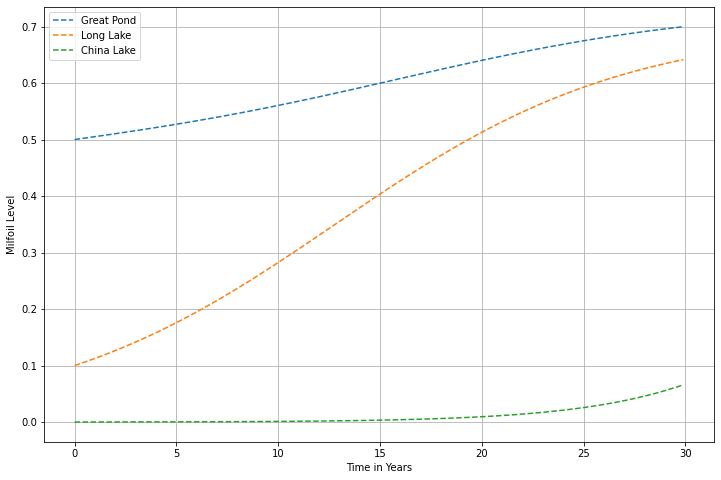

In [2]:
#Plot with original removal rate

# Define numerical parameters
h = 0.1 # Step size
tf = 30   # Final time in years

# Parameters
n = 0.2 #Natural growth rate of milfoil
r = 0.1 #Removal effort rate
I = 0.05 #Proportion of boats that successfully move milfoil from one body of water to the next
a_lg = 0.05 #Proportion of boats going from Long Lake to Great Pond
a_cg = 0.001 #Proportion of boats going from China Lake to Great Pond
a_gl = 0.04 #Proportion of boats going from Great Pond to Long Lake
a_cl = 0.001 #Proportion of boats going from China Lake to Long Lake
a_gc = 0.001 #Proportion of boats going from Great Pond to China Lake
a_lc = 0.001 #Proportion of boats going from Long Lake to China Lake

def model(X):

    G = X[0]
    L = X[1]
    C = X[2]
    dG = n*G*(1-G) - r*G + L*a_lg + C*I*a_cg
    dL = n*L*(1-L) - r*L + L*a_gl + C*I*a_cl
    dC = n*C*(1-C) + G*I*a_gc + L*I*a_lc
    f = np.array([dG,dL,dC])
    return f

# Initial condition
x0 = np.array([0.5,0.1,0])  # Order: G(0), L(0), C(0)

# RK4
soln, t = RK4_system(model,x0,tf,h)


# Use matplotlib to plot the approximate solution
plt.figure(figsize = (12, 8))
plt.plot(t, soln[0,:], '--', label='Great Pond')
plt.plot(t, soln[1,:], '--', label='Long Lake')
plt.plot(t, soln[2,:], '--', label='China Lake')
plt.xlabel('Time in Years')
plt.ylabel('Milfoil Level')
plt.grid()
plt.legend(loc='upper left')
# plt.title("Milfoil Level in Bodies of Water vs. Time")
plt.show()

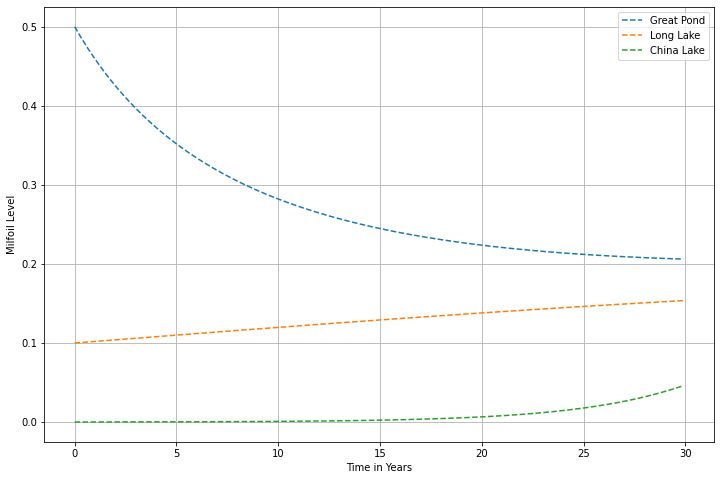

In [3]:
#Plot with doubled removal rate

# Define numerical parameters
h = 0.1 # Step size
tf = 30   # Final time in years

# Parameters
n = 0.2 #Natural growth rate of milfoil
r = 0.2 #Removal effort rate
I = 0.05 #Proportion of boats that successfully move milfoil from one body of water to the next
a_lg = 0.05 #Proportion of boats going from Long Lake to Great Pond
a_cg = 0.001 #Proportion of boats going from China Lake to Great Pond
a_gl = 0.04 #Proportion of boats going from Great Pond to Long Lake
a_cl = 0.001 #Proportion of boats going from China Lake to Long Lake
a_gc = 0.001 #Proportion of boats going from Great Pond to China Lake
a_lc = 0.001 #Proportion of boats going from Long Lake to China Lake

def model(X):

    G = X[0]
    L = X[1]
    C = X[2]
    dG = n*G*(1-G) - r*G + L*a_lg + C*I*a_cg
    dL = n*L*(1-L) - r*L + L*a_gl + C*I*a_cl
    dC = n*C*(1-C) + G*I*a_gc + L*I*a_lc
    f = np.array([dG,dL,dC])
    return f

# Initial condition
x0 = np.array([0.5,0.1,0])  # Order: G(0), L(0), C(0)

# RK4
soln, t = RK4_system(model,x0,tf,h)


# Use matplotlib to plot the approximate solution
plt.figure(figsize = (12, 8))
plt.plot(t, soln[0,:], '--', label='Great Pond')
plt.plot(t, soln[1,:], '--', label='Long Lake')
plt.plot(t, soln[2,:], '--', label='China Lake')
plt.xlabel('Time in Years')
plt.ylabel('Milfoil Level')
plt.grid()
plt.legend(loc='upper right')
# plt.title("Milfoil Level in Bodies of Water vs. Time (Increased Removal Rate)")
plt.show()